In [63]:
import cv2 as cv
import numpy as np

# image=cv.imread('CAT.jpg')

img = np.load("E://Rapid-FLIM_Polymer2//PA//PA_M30_RF070.npy")
image = (img*255).astype(np.uint8)
image = image[1,:,:]

cv.imshow('Image', image )
#blur
image = cv.GaussianBlur(image,(7,7), cv.BORDER_DEFAULT)
cv.imshow('blurred', image)
# image=cv.filter2D(image, -1, (3,3))
# #Cannying
Canny = cv.Canny(image, 150, 255, cv.THRESH_BINARY)
cv.imshow('Canny', Canny)
contours, hierarchies = cv.findContours(Canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

#sobel 
# sobelx = cv.Sobel(image,cv.CV_64F,1,0,ksize=3)
# sobely = cv.Sobel(image,cv.CV_64F,0,1,ksize=3)

# cv.imshow('sobelx',sobelx)
# cv.imshow('sobely',sobely)

# Thresholding
# ret, thresh = cv.threshold(blur, 125, 255, cv.THRESH_BINARY)
#cv.imshow('Thresholded image', thresh)
# contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# dilated = cv.dilate(thresh, (3,3), iterations=5)
# cv.imshow('Dilated', dilated)

print(f'{len(contours)} contour(s) found..!')

cv.waitKey(0)
cv.destroyAllWindows()

0 contour(s) found..!


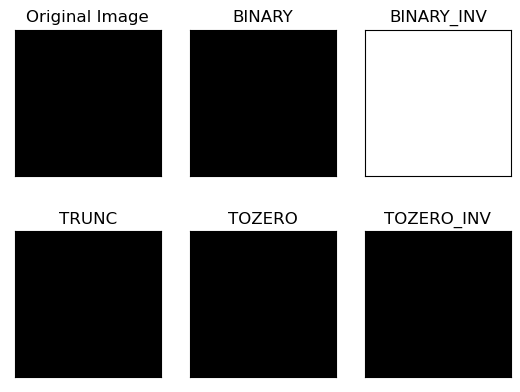

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = np.load('E://Rapid-FLIM_Polymer2//PA//PA_M30_RF070.npy')
img=img[1,:,:]
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

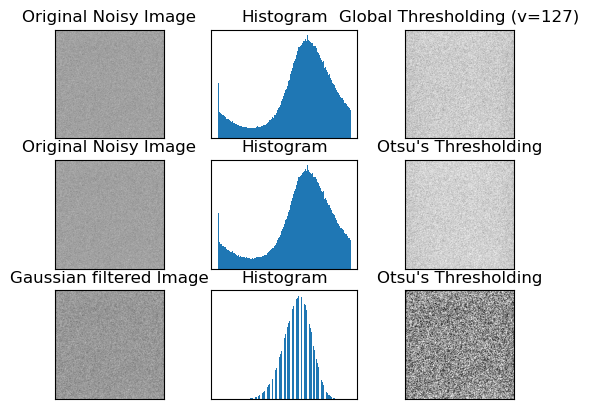

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = np.load('E://Rapid-FLIM_Polymer2//PA//PA_M30_RF070.npy')
img=img[1,:,:]
img = (img*255).astype(np.uint8)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()